In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [9]:
y

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo
...,...
3805,Osmancik
3806,Osmancik
3807,Osmancik
3808,Osmancik


In [13]:
y.value_counts()

Class   
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [19]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.concat([X,y],axis=1)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [27]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

<Axes: >

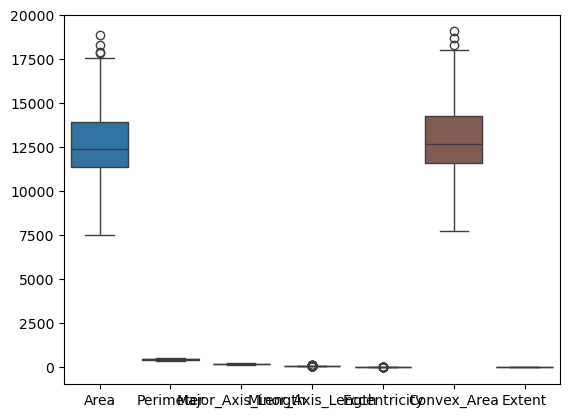

In [29]:
sns.boxplot(data=df)

In [35]:
for i in df:                  
    if df[i].dtypes in ("float64","int64"): 
        q1 = df[i].quantile(0.25)  
        q3 = df[i].quantile(0.75) 
        iqr = q3-q1  
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

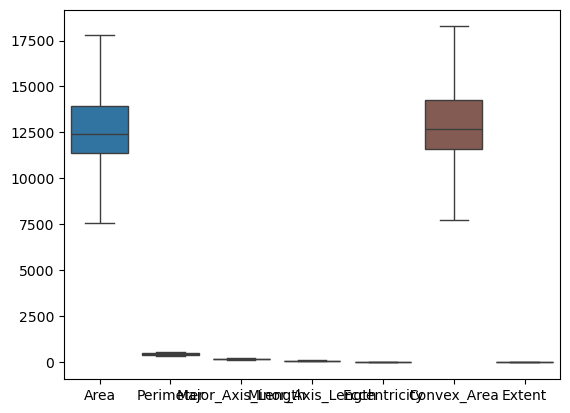

In [37]:
sns.boxplot(data=df)

In [39]:
Quantitative_variable=df.select_dtypes(include=[np.number])
Quantitative_variable.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024


In [45]:
Qualitative_variable = df.select_dtypes(include=['object'])
Qualitative_variable.head()

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo


In [49]:
from sklearn.preprocessing import LabelEncoder

Qualitative_variable = Qualitative_variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_variable.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [53]:
final_combine=pd.concat([Quantitative_variable,Qualitative_variable],axis=1)
final_combine.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0


In [55]:
from sklearn.model_selection import train_test_split

x=final_combine.drop('Class',axis=1)
y=final_combine[['Class']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [59]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
2620,9335.0,388.806000,160.156158,75.164803,0.883027,9536.0,0.623331,1
322,14329.0,486.277008,206.572296,89.212402,0.901936,14588.0,0.812762,0
3532,10309.0,396.539001,161.233414,81.937103,0.861245,10478.0,0.707550,1
3046,12780.0,437.028992,175.116821,93.660584,0.844949,12940.0,0.706311,1
2686,10524.0,402.494995,164.081940,82.464378,0.864530,10713.0,0.632528,1


In [63]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

build = LogisticRegression()
Model = sfs(build, n_features_to_select=5, direction='forward', scoring='accuracy')
Model.fit(x_train,y_train) 

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [65]:
Model.feature_names_in_

array(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent'], dtype=object)

In [67]:
Model.get_feature_names_out()

array(['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Extent'], dtype=object)

In [69]:
x_train=x_train.loc[:,['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Extent']]
x_train.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent
2620,388.806000,160.156158,75.164803,0.883027,0.623331
322,486.277008,206.572296,89.212402,0.901936,0.812762
3532,396.539001,161.233414,81.937103,0.861245,0.707550
3046,437.028992,175.116821,93.660584,0.844949,0.706311
2686,402.494995,164.081940,82.464378,0.864530,0.632528


In [71]:
from sklearn.linear_model import LogisticRegression

build = LogisticRegression()
Model1 = build.fit(x_train, y_train)

In [73]:
Model1.intercept_

array([26.57126471])

In [75]:
Model1.coef_

array([[-0.04620576, -0.14992965,  0.14327715, 13.30203504, -1.28934369]])

In [77]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Class
2620,388.806000,160.156158,75.164803,0.883027,0.623331,1
322,486.277008,206.572296,89.212402,0.901936,0.812762,0
3532,396.539001,161.233414,81.937103,0.861245,0.707550,1
3046,437.028992,175.116821,93.660584,0.844949,0.706311,1
2686,402.494995,164.081940,82.464378,0.864530,0.632528,1


In [79]:
train['Probability']= Model1.predict_proba(x_train)[:,1]  # [Row , column]
train.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Class,Probability
2620,388.806000,160.156158,75.164803,0.883027,0.623331,1,0.998178
322,486.277008,206.572296,89.212402,0.901936,0.812762,0,0.041603
3532,396.539001,161.233414,81.937103,0.861245,0.707550,1,0.998272
3046,437.028992,175.116821,93.660584,0.844949,0.706311,1,0.979590
2686,402.494995,164.081940,82.464378,0.864530,0.632528,1,0.997193


In [81]:
train['Predicted']=np.where(train['Probability']>=0.7,1,0)
train.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Class,Probability,Predicted
2620,388.806000,160.156158,75.164803,0.883027,0.623331,1,0.998178,1
322,486.277008,206.572296,89.212402,0.901936,0.812762,0,0.041603,0
3532,396.539001,161.233414,81.937103,0.861245,0.707550,1,0.998272,1
3046,437.028992,175.116821,93.660584,0.844949,0.706311,1,0.979590,1
2686,402.494995,164.081940,82.464378,0.864530,0.632528,1,0.997193,1


In [83]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Class'])
matrix

array([[1237,  214],
       [  57, 1540]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report

print(classification_report(train['Predicted'], train['Class']))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1451
           1       0.88      0.96      0.92      1597

    accuracy                           0.91      3048
   macro avg       0.92      0.91      0.91      3048
weighted avg       0.92      0.91      0.91      3048



In [87]:
x_test = x_test.loc[:,['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Extent']]
x_test.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent
2030,375.093994,156.984894,74.229424,0.881146,0.737398
2225,443.260986,179.814194,83.876404,0.884542,0.593101
1053,496.579010,212.570801,83.774239,0.919067,0.527816
3685,451.115997,183.645599,86.696434,0.881553,0.602117
2976,420.455994,168.257462,88.485497,0.850550,0.710089


In [89]:
test = pd.concat([x_test,y_test],axis=1)
test.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Class
2030,375.093994,156.984894,74.229424,0.881146,0.737398,1
2225,443.260986,179.814194,83.876404,0.884542,0.593101,1
1053,496.579010,212.570801,83.774239,0.919067,0.527816,0
3685,451.115997,183.645599,86.696434,0.881553,0.602117,1
2976,420.455994,168.257462,88.485497,0.850550,0.710089,1


In [91]:
test['Probability']= Model1.predict_proba(x_test)[:,1]  
test.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Class,Probability
2030,375.093994,156.984894,74.229424,0.881146,0.737398,1,0.999183
2225,443.260986,179.814194,83.876404,0.884542,0.593101,1,0.895635
1053,496.579010,212.570801,83.774239,0.919067,0.527816,0,0.009046
3685,451.115997,183.645599,86.696434,0.881553,0.602117,1,0.827057
2976,420.455994,168.257462,88.485497,0.850550,0.710089,1,0.993263


In [93]:
test['Predicted']=np.where(test['Probability']>=0.7,1,0)
test.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Class,Probability,Predicted
2030,375.093994,156.984894,74.229424,0.881146,0.737398,1,0.999183,1
2225,443.260986,179.814194,83.876404,0.884542,0.593101,1,0.895635,1
1053,496.579010,212.570801,83.774239,0.919067,0.527816,0,0.009046,0
3685,451.115997,183.645599,86.696434,0.881553,0.602117,1,0.827057,1
2976,420.455994,168.257462,88.485497,0.850550,0.710089,1,0.993263,1


In [95]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'], test['Class'])
matrix

array([[322,  48],
       [ 14, 378]], dtype=int64)

In [99]:
from sklearn.metrics import classification_report

print(classification_report(test['Predicted'], test['Class']))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       370
           1       0.89      0.96      0.92       392

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762

